In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from ipywidgets import interact

In [57]:
seed = 42

In [58]:
np.random.seed(seed)

In [59]:
%matplotlib inline

In [60]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [61]:
df_train.head()

StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7
0   1.2.826.0.1.3680043.6200                1   1   1   0   0   0   0   0
1  1.2.826.0.1.3680043.27262                1   0   1   0   0   0   0   0
2  1.2.826.0.1.3680043.21561                1   0   1   0   0   0   0   0
3  1.2.826.0.1.3680043.12351                0   0   0   0   0   0   0   0
4   1.2.826.0.1.3680043.1363                1   0   0   0   0   1   0   0

In [62]:
df_test.shape

(3, 3)

In [63]:
bounding_box_df = pd.read_csv('train_bounding_boxes.csv')

In [64]:
label_stats = bounding_box_df.groupby(['StudyInstanceUID']).count()

<AxesSubplot:xlabel='StudyInstanceUID'>

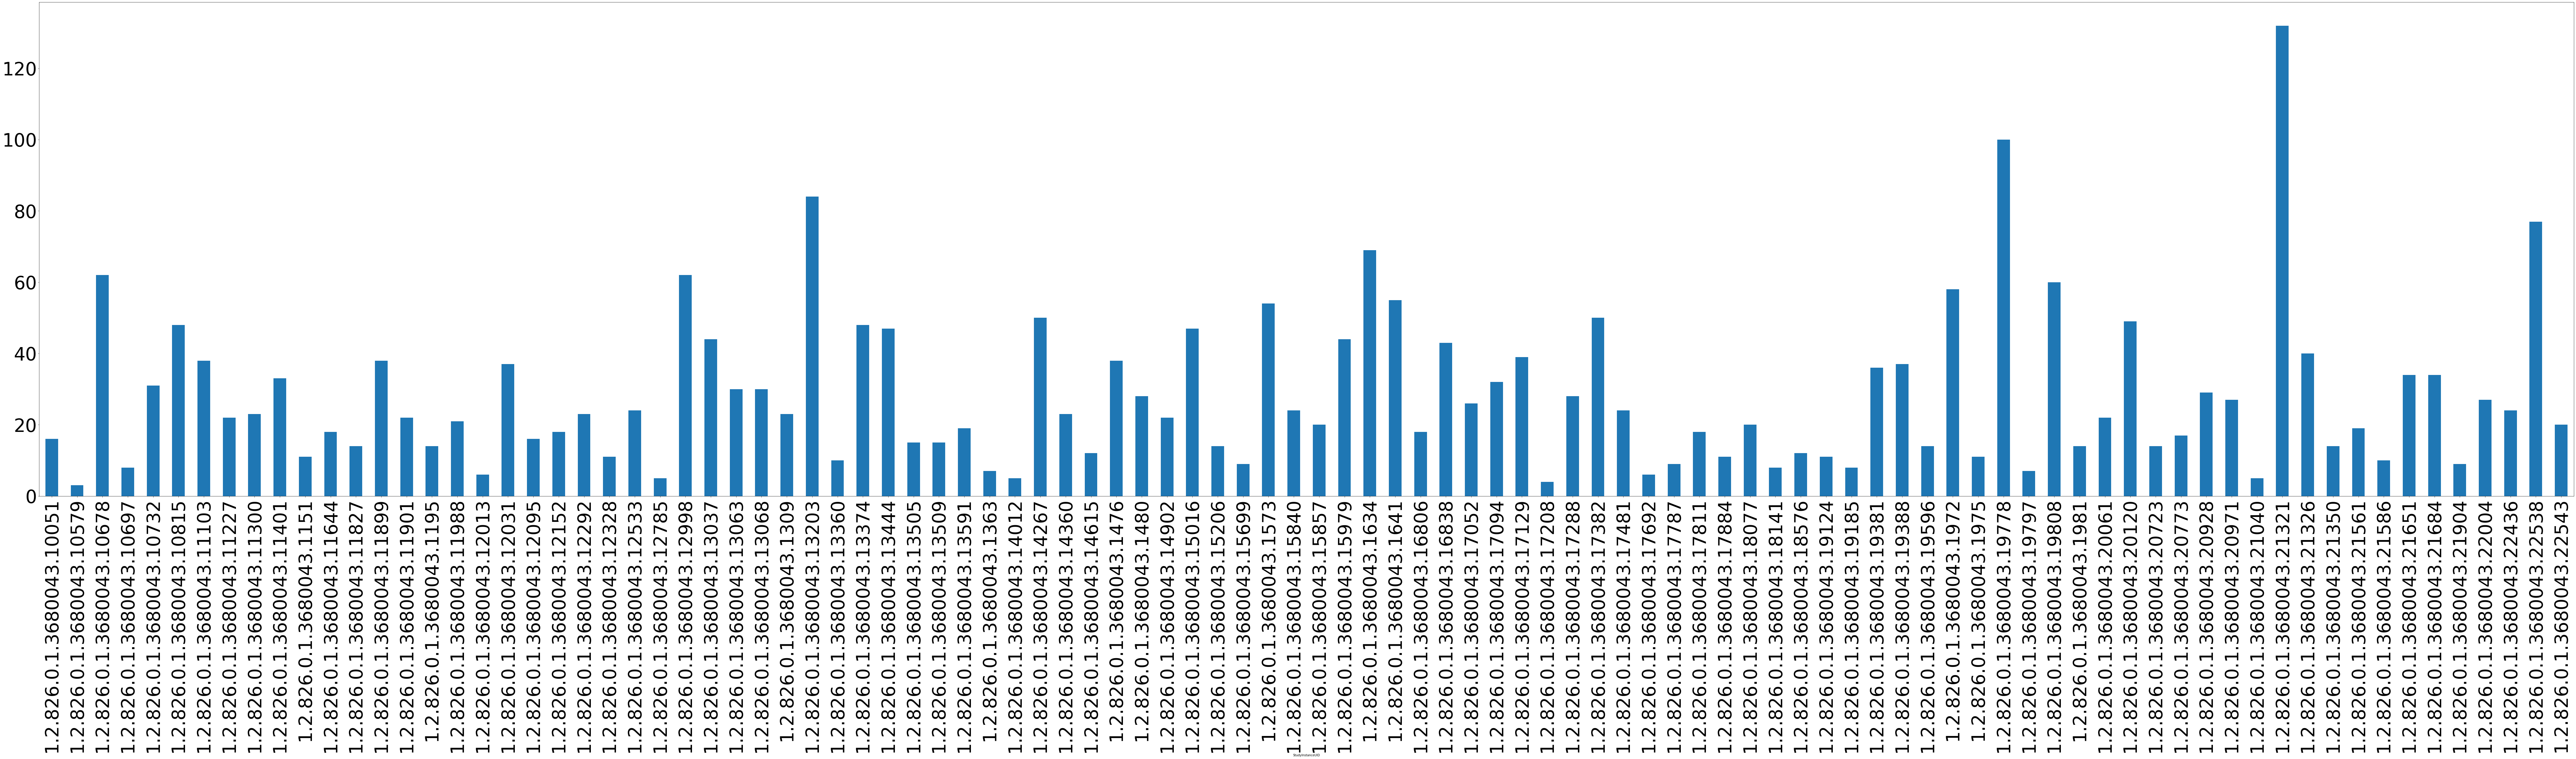

In [65]:
label_stats['x'].head(100).plot(kind="bar", figsize=(150,30), fontsize=60)

In [66]:
label_stats['x'].describe()

count    235.000000
mean      30.710638
std       26.022699
min        2.000000
25%       14.000000
50%       24.000000
75%       38.000000
max      167.000000
Name: x, dtype: float64

In [67]:
bounding_box_df.shape

(7217, 6)

In [68]:
bounding_box_df.head()

StudyInstanceUID          x          y     width    height  \
0  1.2.826.0.1.3680043.10051  219.27715  216.71419  17.30440  20.38517   
1  1.2.826.0.1.3680043.10051  221.56460  216.71419  17.87844  25.24362   
2  1.2.826.0.1.3680043.10051  216.82151  221.62546  27.00959  26.37454   
3  1.2.826.0.1.3680043.10051  214.49455  215.48637  27.92726  37.51363   
4  1.2.826.0.1.3680043.10051  214.00000  215.48637  27.00000  43.51363   

   slice_number  
0           133  
1           134  
2           135  
3           136  
4           137

In [69]:
import utils

In [70]:
index = 0
record = bounding_box_df.iloc[index]

In [71]:
record.x

219.27715

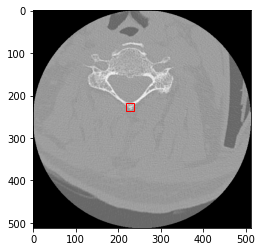

In [72]:
index = 0
record = bounding_box_df.iloc[index]
plt = utils.show_dcm_image_with_bounding_box(f'train_images/{record.StudyInstanceUID}/{record.slice_number}.dcm', record.x, record.y, record.width, record.height)
plt.show()


In [73]:
df_train[df_train['StudyInstanceUID']=='1.2.826.0.1.3680043.10051']

StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7
1253  1.2.826.0.1.3680043.10051                1   0   0   0   1   0   0   0

## Patient count with fracture vs no fracture

<AxesSubplot:xlabel='patient_overall'>

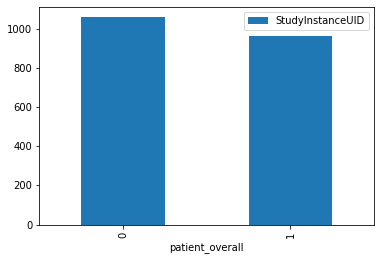

In [74]:
df_train.groupby("patient_overall").count()[["StudyInstanceUID"]].plot(kind="bar")

# Patient fracture distribution

In [75]:
num_fractures = df_train[[f"C{i}" for i in range(1,8)]][df_train["patient_overall"]==1].sum(axis=1)

In [76]:
num_fractures.value_counts()

1    623
2    239
3     64
4     26
5      7
6      2
dtype: int64

<AxesSubplot:>

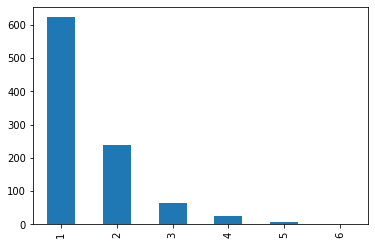

In [77]:
num_fractures.value_counts().plot(kind="bar")

In [78]:
fracture_count_patient = {k:num_fractures[num_fractures == k].index.tolist() for k in range(1,7)}

In [79]:
numsample = 1
fracture_count_patient_sample = {k: np.random.choice(fracture_count_patient[k], numsample,) for k in fracture_count_patient}

In [80]:
fracture_count_patient_sample

{1: array([343]),
 2: array([1476]),
 3: array([1023]),
 4: array([1009]),
 5: array([755]),
 6: array([1863])}

# Patients with bounding box information

In [81]:
study_id_boundingbox = bounding_box_df.StudyInstanceUID.unique()

In [82]:
df_train["has_boundingbox"] = df_train.apply(lambda x: x[0] in study_id_segmentation, axis=1)

In [85]:
fracture_count_patient_sample_with_boundingbox = utils.get_boundingbox_records_sample_by_fracture_count(df_train)

In [86]:
fracture_count_patient_sample_with_boundingbox

{1: array([2007]),
 2: array([1547]),
 3: array([1794]),
 4: array([1088]),
 5: array([822]),
 6: array([1863])}

In [87]:
fracture_count_1 = utils.get_sample_by_fracture_count(fracture_count_patient_sample_with_segmentation, bounding_box_df, df_train, count=1)

In [88]:
fracture_count_1.iloc[0]

StudyInstanceUID    1.2.826.0.1.3680043.17052
x                                       262.0
y                                       104.0
width                                   107.0
height                                   54.0
slice_number                              298
Name: 1571, dtype: object

(<Figure size 3600x3600 with 25 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

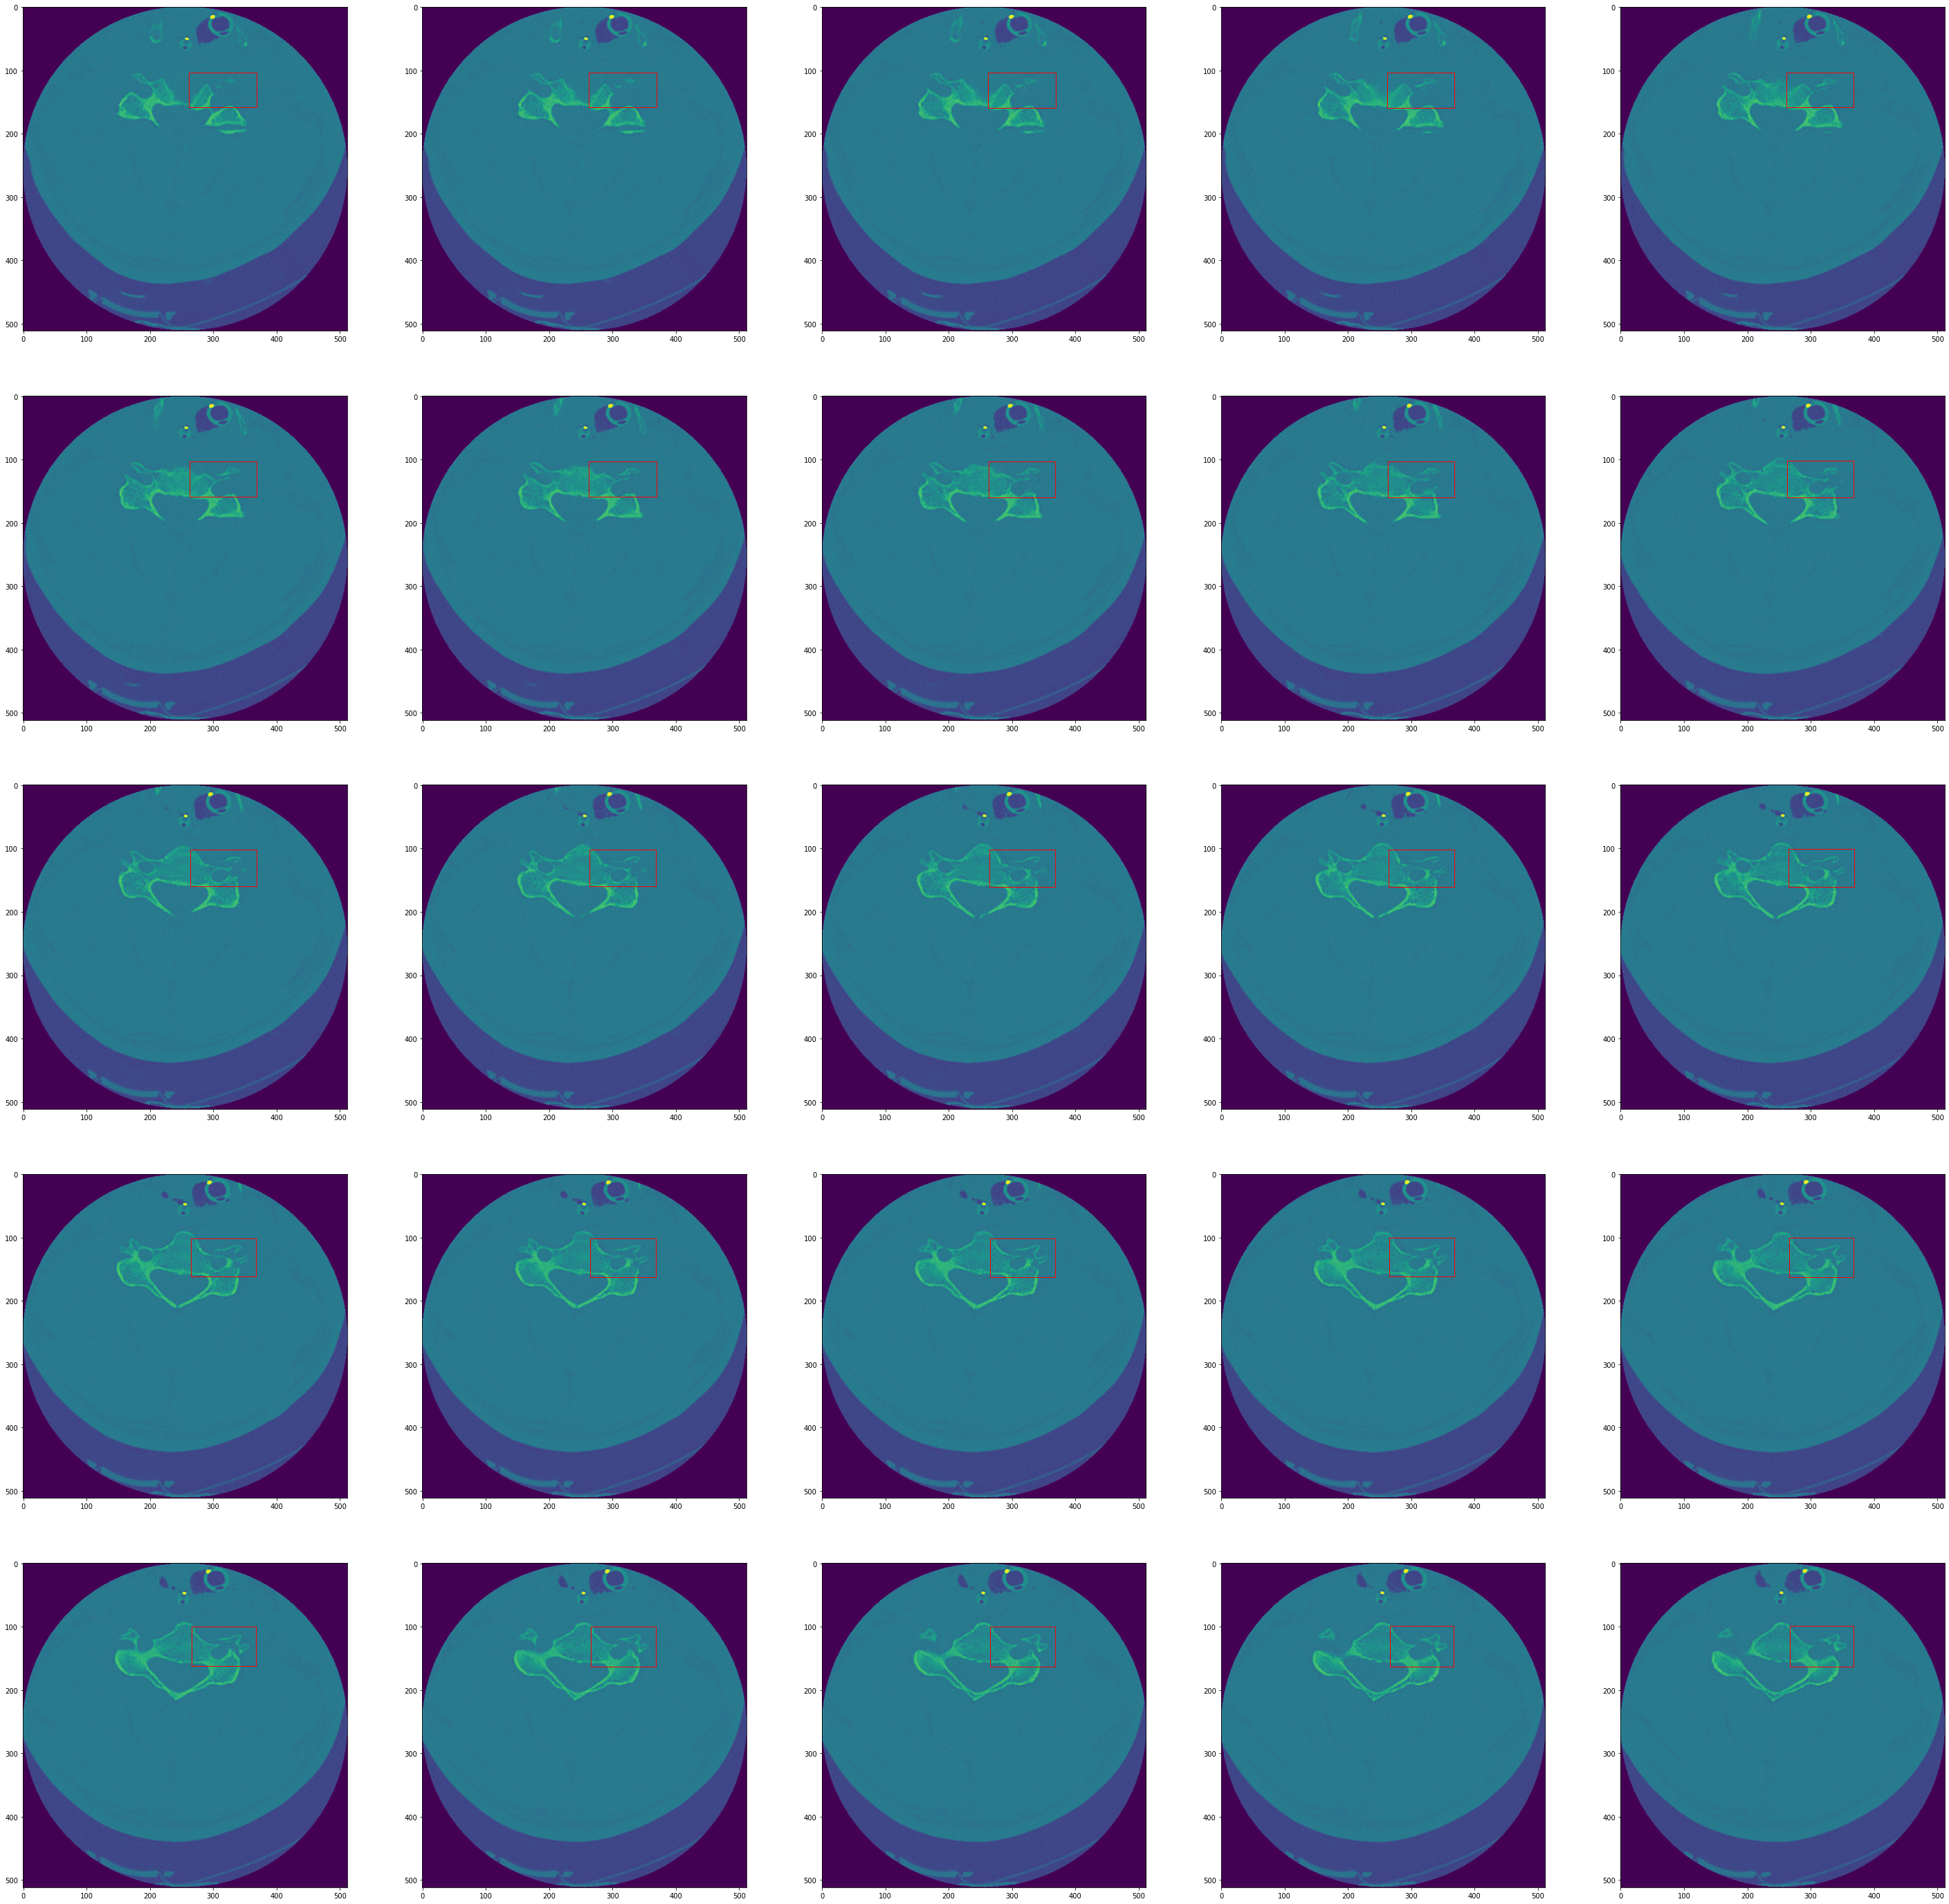

In [89]:
utils.show_slices_for_patient(fracture_count_1[fracture_count_1.StudyInstanceUID=='1.2.826.0.1.3680043.17052'], figsize=(50,50), plot_dim=(5,5))

In [90]:
utils.show_dcm_image(f'train_images/1.2.826.0.1.3680043.17052/298.dcm').shape

(512, 512)

In [92]:
fracture_count_2 = utils.get_sample_by_fracture_count(fracture_count_patient_sample_with_segmentation, bounding_box_df, df_train, count=2)

In [93]:
fracture_count_2.head()

StudyInstanceUID          x          y      width     height  \
1235  1.2.826.0.1.3680043.15699  142.27257  108.74336   90.61946  113.27434   
1236  1.2.826.0.1.3680043.15699  143.00000  113.00000  101.86956  124.12664   
1237  1.2.826.0.1.3680043.15699  144.00000  117.00000  101.00000  118.00000   
1238  1.2.826.0.1.3680043.15699  145.00000  121.00000  102.00000  113.00000   
1239  1.2.826.0.1.3680043.15699  142.00000  126.00000  106.00000  106.00000   

      slice_number  
1235           148  
1236           149  
1237           150  
1238           151  
1239           152

(<Figure size 1800x720 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

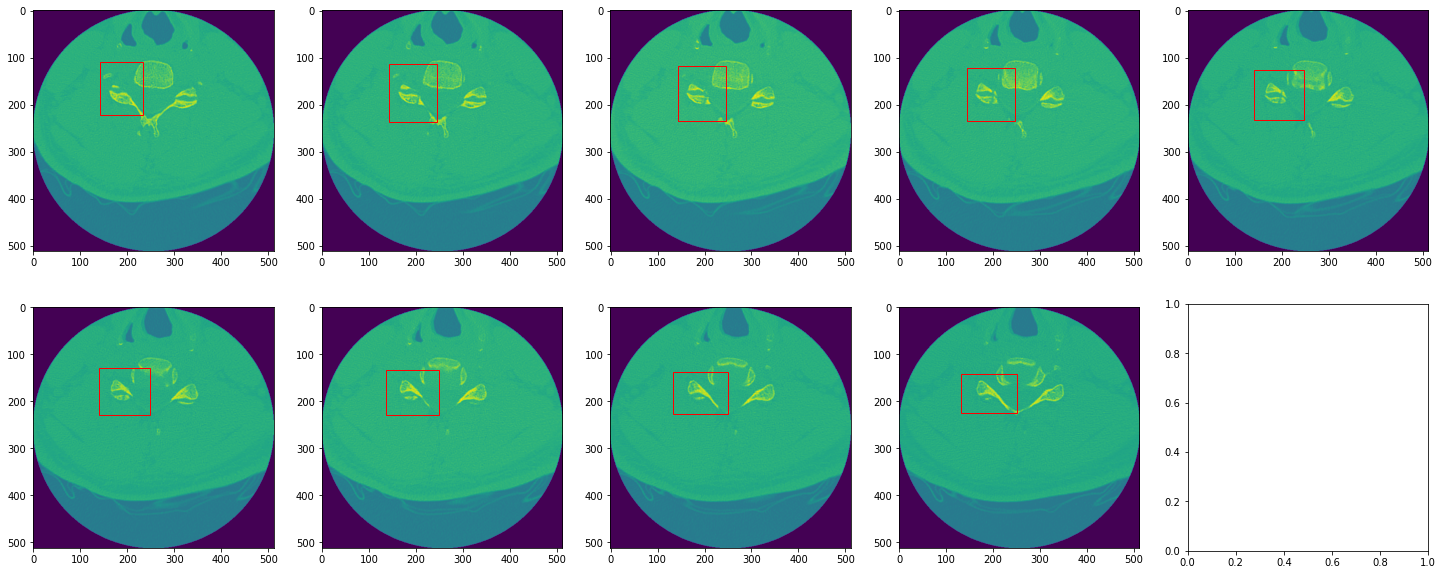

In [94]:
utils.show_slices_for_patient(fracture_count_2[fracture_count_2.StudyInstanceUID=='1.2.826.0.1.3680043.15699'], figsize=(25,10), plot_dim=(2,5))

In [95]:
fracture_count_6 = utils.get_sample_by_fracture_count(fracture_count_patient_sample_with_segmentation, bounding_box_df, df_train, count=6)

In [96]:
fracture_count_6.iloc[0].StudyInstanceUID

'1.2.826.0.1.3680043.25772'

(<Figure size 1800x720 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

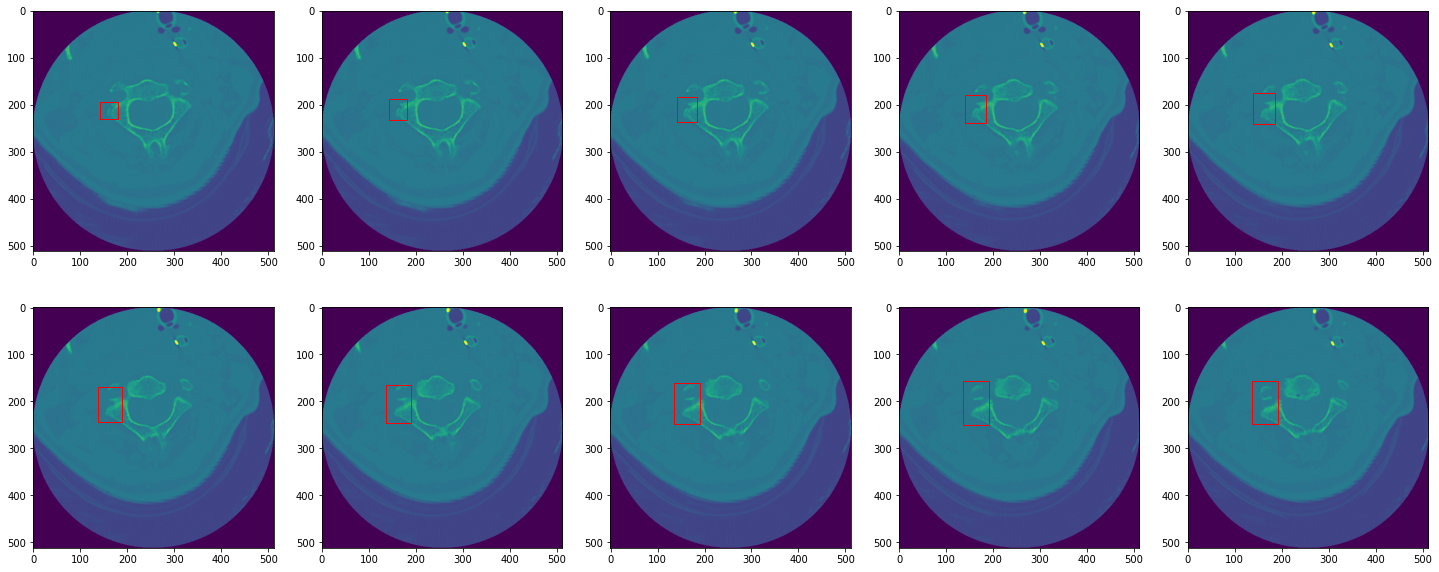

In [97]:
utils.show_slices_for_patient(fracture_count_6[fracture_count_6.StudyInstanceUID=='1.2.826.0.1.3680043.25772'], figsize=(25,10), plot_dim=(2,5))

In [145]:
fracture_count_3 = utils.get_sample_by_fracture_count(fracture_count_patient_sample_with_segmentation, bounding_box_df, df_train, count=3)

In [146]:
fracture_count_4 = utils.get_sample_by_fracture_count(fracture_count_patient_sample_with_segmentation, bounding_box_df, df_train, count=4)

In [147]:
fracture_count_5 = utils.get_sample_by_fracture_count(fracture_count_patient_sample_with_segmentation, bounding_box_df, df_train, count=5)

# Segmentation Data

In [99]:
import nibabel as nib

In [113]:
segmentation_df = utils.get_segmentation_info_ids()

In [121]:
df_train["has_segmentation"] = df_train.apply(lambda x: x[0] in segmentation_df.StudyInstanceUID.tolist(), axis=1)

In [135]:
segmentation_samples = utils.get_segmentation_samples(df_train)

In [136]:
segmentation_samples # No segmentation data found for fracture count 6

{1: array([1045]),
 4: array([1311]),
 2: array([1932]),
 5: array([1373]),
 3: array([1794])}

In [143]:
count=3
ID = df_train.iloc[segmentation_samples[count][0]].StudyInstanceUID
segmentation = nib.load(f'segmentations/{ID}.nii')
print(ID)
(df_train[df_train.StudyInstanceUID == ID].head())


1.2.826.0.1.3680043.28327


StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7  \
1794  1.2.826.0.1.3680043.28327                1   0   0   0   0   1   1   1   

      has_boundingbox  has_segmentation  
1794             True              True

In [153]:
print(fracture_count_3[fracture_count_3.StudyInstanceUID==ID].slice_number.tolist())

[191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229]


(<Figure size 1800x720 with 10 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

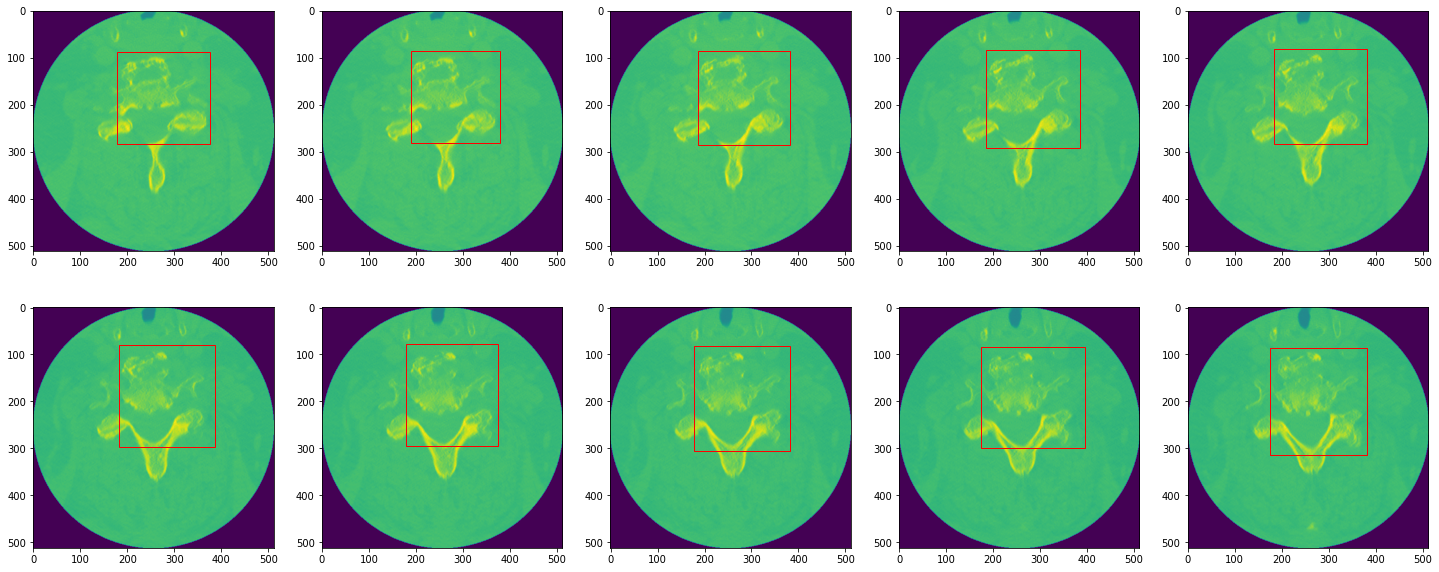

In [150]:
utils.show_slices_for_patient(fracture_count_3[fracture_count_3.StudyInstanceUID==ID], figsize=(25,10), plot_dim=(2,5))

In [144]:
@interact(slice=(0,512))
def show_segmentation(slice):
    fig, ax = plt.subplots(1,3, figsize=(15,15))
    ax[0].imshow(segmentation.get_fdata()[slice,:,:])    
    ax[1].imshow(segmentation.get_fdata()[:,slice,:])    
    ax[2].imshow(segmentation.get_fdata()[:,:,slice])

interactive(children=(IntSlider(value=256, description='slice', max=512), Output()), _dom_classes=('widget-int…

In [44]:
segmentation = nib.load('segmentations/1.2.826.0.1.3680043.10633.nii')

In [45]:
print(segmentation.affine)

[[  -0.28515625   -0.            0.           68.        ]
 [  -0.            0.28515625   -0.         -243.71484375]
 [   0.            0.            0.5         100.09997559]
 [   0.            0.            0.            1.        ]]


In [54]:
print(segmentation.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 429   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.          0.28515625  0.28515625  0.5         0.          0.
  0.          0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 68.0
qoffset_y       : -243.71484
qof